#📌 Extracción

In [55]:
import pandas as pd
import numpy as np

Primero Procedemos a obtener la información de la página web

In [56]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
datos=pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Utilizamos un loop para expandir todos los diccionarios contenidos en columnas en la base de datos

In [57]:
# Verificar qué columnas contienen diccionarios
json_cols = [col for col in datos.columns if isinstance(datos[col].iloc[0], dict)]

# Expandir cada columna anidada
for col in json_cols:
    expanded = datos[col].apply(pd.Series)
    # Para evitar conflictos de nombre de columnas repetidas
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    datos = pd.concat([datos.drop(columns=[col]), expanded], axis=1)

# Verificar resultado
print(datos.shape)
datos.head()

(7267, 20)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


Volvemos a ampliar los diccionarios en columnas

In [58]:
# Verificar qué columnas contienen diccionarios
json_cols = [col for col in datos.columns if isinstance(datos[col].iloc[0], dict)]

# Expandir cada columna anidada
for col in json_cols:
    expanded = datos[col].apply(pd.Series)
    # Para evitar conflictos de nombre de columnas repetidas
    expanded.columns = [f"{col}_{subcol}" for subcol in expanded.columns]
    datos = pd.concat([datos.drop(columns=[col]), expanded], axis=1)

# Verificar resultado
print(datos.shape)
datos.head()

(7267, 21)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Observamos el tipo de dato que tiene cada columna para empezar a transformarlo

In [59]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

#🔧 Transformación

Convertimos los datos vacios ' ' en nulos

In [60]:
datos = datos.replace(' ', np.nan)

Procedemos a convertir la variable "Churn" en variable Booleana

In [61]:
datos['Churn'] = datos['Churn'].map({'Yes': True, 'No': False})
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,False,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,False,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,True,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Procedemos a convertir los datos en booleanos o cuantitativos según sea el caso

In [62]:
datos['customer_gender']=datos['customer_gender'].map({'Male':True,'Female':False})
datos['customer_SeniorCitizen']=datos['customer_SeniorCitizen'].astype(bool)
datos['customer_Partner']=datos['customer_Partner'].map({'Yes':True,'No':False})
datos['customer_Dependents']=datos['customer_Dependents'].map({'Yes':True,'No':False})
datos['phone_PhoneService']=datos['phone_PhoneService'].map({'Yes':True,'No':False})
datos['phone_MultipleLines']=datos['phone_MultipleLines'].map({'Yes':True,'No':False,'No phone service':False})
datos['have_internet_InternetService']=datos['internet_InternetService'].map({'Fiber optic':True,'DSL':True,'No':False})
datos['internet_DeviceProtection']=datos['internet_DeviceProtection'].map({'Yes':True,'No':False,'No internet service':False})
datos['internet_StreamingTV']=datos['internet_StreamingTV'].map({'Yes':True,'No':False,'No internet service':False})
datos['internet_OnlineSecurity']=datos['internet_OnlineSecurity'].map({'Yes':True,'No':False,'No internet service':False})
datos['internet_StreamingMovies']=datos['internet_StreamingMovies'].map({'Yes':True,'No':False,'No internet service':False})
datos['internet_OnlineBackup']=datos['internet_OnlineBackup'].map({'Yes':True,'No':False,'No internet service':False})
datos['internet_TechSupport']=datos['internet_TechSupport'].map({'Yes':True,'No':False,'No internet service':False})
datos['account_PaperlessBilling']=datos['account_PaperlessBilling'].map({'Yes':True,'No':False})
datos['account_Charges_Total']=datos['account_Charges_Total'].astype(float)
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,have_internet_InternetService
0,0002-ORFBO,False,False,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,True
1,0003-MKNFE,False,True,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,True
2,0004-TLHLJ,True,True,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,True
3,0011-IGKFF,True,True,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,True
4,0013-EXCHZ,True,False,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,True


In [63]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7267 non-null   object 
 1   Churn                          7043 non-null   object 
 2   customer_gender                7267 non-null   bool   
 3   customer_SeniorCitizen         7267 non-null   bool   
 4   customer_Partner               7267 non-null   bool   
 5   customer_Dependents            7267 non-null   bool   
 6   customer_tenure                7267 non-null   int64  
 7   phone_PhoneService             7267 non-null   bool   
 8   phone_MultipleLines            7267 non-null   bool   
 9   internet_InternetService       7267 non-null   object 
 10  internet_OnlineSecurity        7267 non-null   bool   
 11  internet_OnlineBackup          7267 non-null   bool   
 12  internet_DeviceProtection      7267 non-null   b

Veo que todavía Churn es de tipo Object, por lo que forzamos a que se vueva booleana

In [64]:
datos['Churn']=datos['Churn'].astype(bool)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7267 non-null   object 
 1   Churn                          7267 non-null   bool   
 2   customer_gender                7267 non-null   bool   
 3   customer_SeniorCitizen         7267 non-null   bool   
 4   customer_Partner               7267 non-null   bool   
 5   customer_Dependents            7267 non-null   bool   
 6   customer_tenure                7267 non-null   int64  
 7   phone_PhoneService             7267 non-null   bool   
 8   phone_MultipleLines            7267 non-null   bool   
 9   internet_InternetService       7267 non-null   object 
 10  internet_OnlineSecurity        7267 non-null   bool   
 11  internet_OnlineBackup          7267 non-null   bool   
 12  internet_DeviceProtection      7267 non-null   b

In [65]:
print(datos.shape)
datos.head()

(7267, 22)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,have_internet_InternetService
0,0002-ORFBO,False,False,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,True
1,0003-MKNFE,False,True,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,True
2,0004-TLHLJ,True,True,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,True
3,0011-IGKFF,True,True,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,True
4,0013-EXCHZ,True,False,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,True


In [66]:
datos['internet_InternetService'].value_counts()

,count
internet_InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [67]:
datos['internet_OnlineSecurity'].value_counts()

,count
internet_OnlineSecurity,
False,5189
True,2078


In [68]:
datos['account_PaymentMethod'].value_counts()

,count
account_PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [69]:
datos.drop_duplicates()
print(datos.shape)

(7267, 22)


[texto del enlace](https:// [texto del enlace](https://))#📊 Carga y análisis

In [70]:
datos['Cuentas_Diarias']=datos['account_Charges_Monthly']/30
datos.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,have_internet_InternetService,Cuentas_Diarias
0,0002-ORFBO,False,False,False,True,True,9,True,False,DSL,...,True,True,False,One year,True,Mailed check,65.6,593.30,True,2.186667
1,0003-MKNFE,False,True,False,False,False,9,True,True,DSL,...,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,True,1.996667
2,0004-TLHLJ,True,True,False,False,False,4,True,False,Fiber optic,...,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,True,2.463333
3,0011-IGKFF,True,True,True,True,False,13,True,False,Fiber optic,...,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,True,3.266667
4,0013-EXCHZ,True,False,True,True,False,3,True,False,Fiber optic,...,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,True,2.796667


In [71]:
datos.describe()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [72]:
datos["Churn"].value_counts()

,count
Churn,
False,5174
True,2093


In [73]:
import pandas as pd

# Suponiendo que tu DataFrame se llama df
churn_counts = datos['Churn'].value_counts()

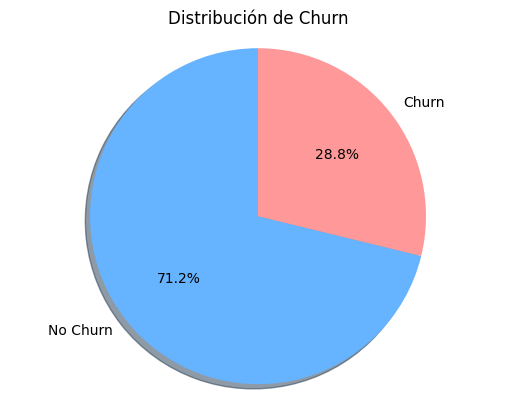

In [74]:
import matplotlib.pyplot as plt

# Etiquetas personalizadas (opcional)
labels = ['No Churn', 'Churn']
colors = ['#66b3ff', '#ff9999']  # Puedes elegir otros colores

plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Distribución de Churn')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [75]:
datos["Cuentas_Diarias"].groupby(datos["Churn"]).mean()

,Cuentas_Diarias
Churn,
False,2.042171
True,2.442032


In [76]:
import pandas as pd

promedio_por_churn = datos.groupby('Churn')['Cuentas_Diarias'].mean().reset_index()

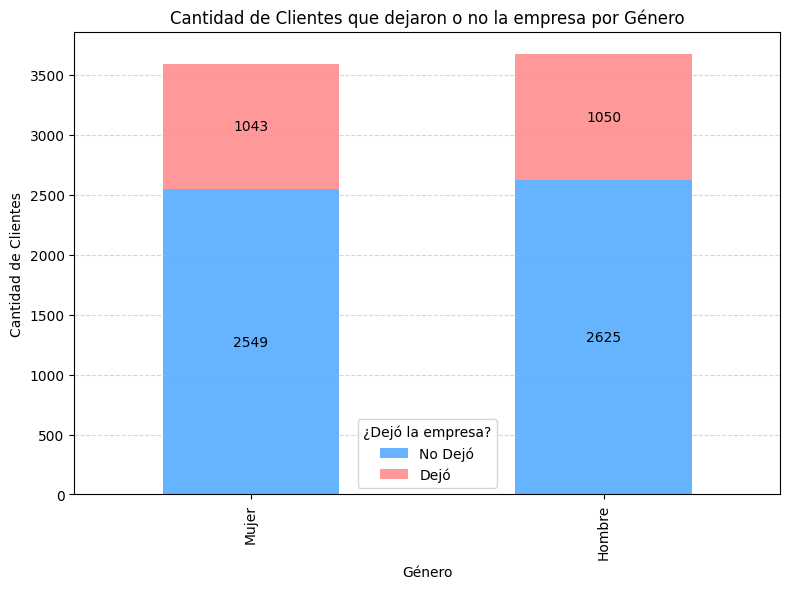

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear tabla cruzada
tabla = pd.crosstab(datos['customer_gender'], datos['Churn'])

# Etiquetas legibles
tabla.index = ['Mujer', 'Hombre']
tabla.columns = ['No Dejó', 'Dejó']  # False → No Churn, True → Churn

# Graficar
ax = tabla.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], figsize=(8, 6))

# Agregar etiquetas
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='black')

# Estética del gráfico
plt.title('Cantidad de Clientes que dejaron o no la empresa por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Dejó la empresa?')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




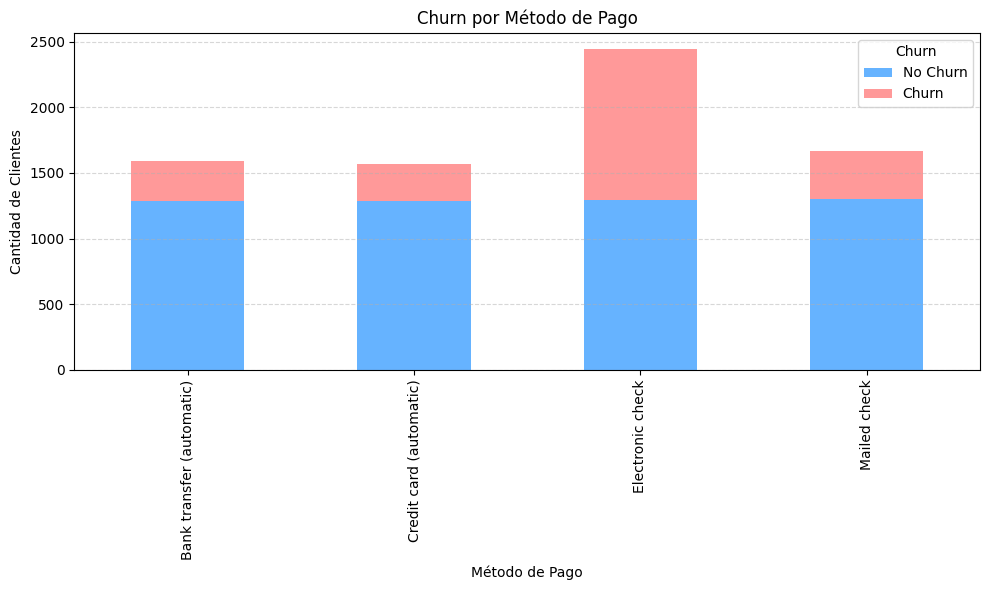

In [78]:
import pandas as pd

tabla = pd.crosstab(datos['account_PaymentMethod'], datos['Churn'])

tabla.columns = ['No Churn', 'Churn']  # si Churn es booleana

tabla.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff9999'])

plt.title('Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

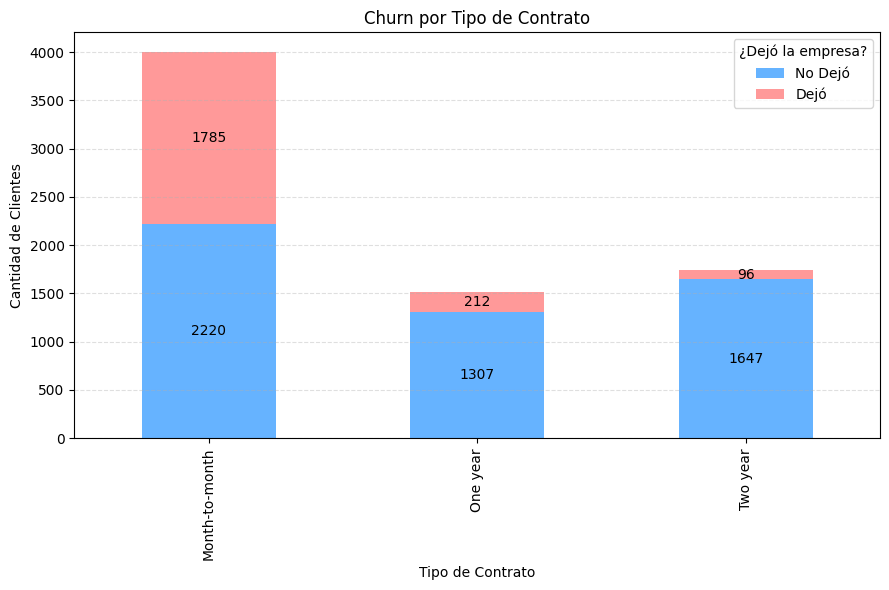

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear tabla cruzada entre tipo de contrato y churn
tabla = pd.crosstab(datos['account_Contract'], datos['Churn'])

# Renombrar columnas para mayor claridad
tabla.columns = ['No Dejó', 'Dejó']

# Graficar barras apiladas
ax = tabla.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], figsize=(9, 6))

# Agregar etiquetas en cada segmento
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='black')

# Estética
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Dejó la empresa?')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

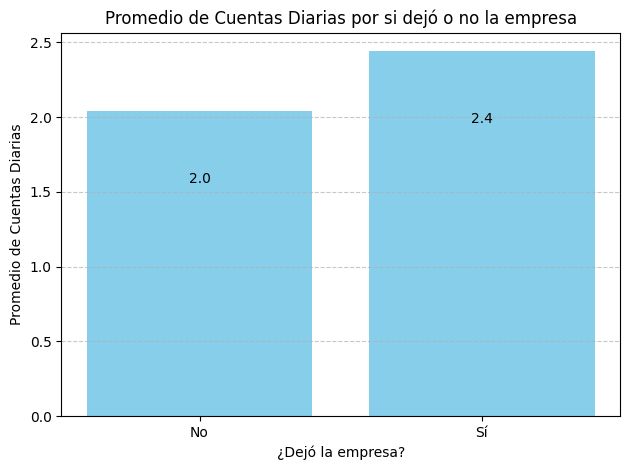

In [80]:
import matplotlib.pyplot as plt

# Crear una copia para no alterar el original
promedio_churn_etiquetas = promedio_por_churn.copy()

# Reemplazar True/False por etiquetas legibles
promedio_churn_etiquetas['Churn'] = promedio_churn_etiquetas['Churn'].replace({True: 'Sí', False: 'No'})

# Graficar
plt.bar(promedio_churn_etiquetas['Churn'], promedio_churn_etiquetas['Cuentas_Diarias'], color='skyblue')
plt.title('Promedio de Cuentas Diarias por si dejó o no la empresa')
plt.xlabel('¿Dejó la empresa?')
plt.ylabel('Promedio de Cuentas Diarias')

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(promedio_churn_etiquetas['Cuentas_Diarias']):
    plt.text(i, valor - 0.5, f'{valor:.1f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

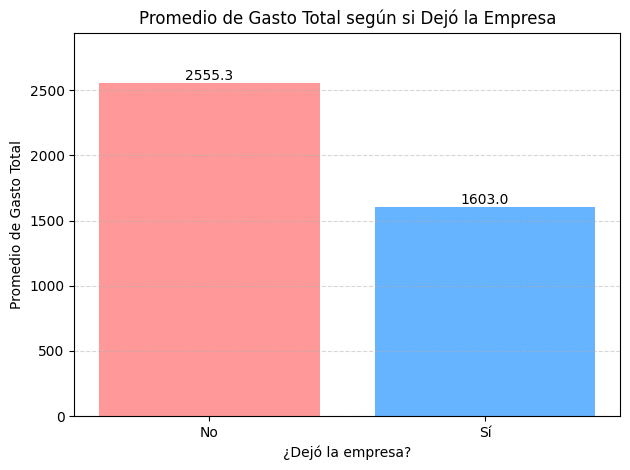

In [81]:


import matplotlib.pyplot as plt

# Agrupar por churn y calcular promedio
promedio_Charges_Total = datos.groupby('Churn')['account_Charges_Total'].mean().reset_index()

# Cambiar etiquetas True/False por 'Sí' y 'No'
promedio_Charges_Total['Churn'] = promedio_Charges_Total['Churn'].replace({True: 'Sí', False: 'No'})

# Gráfico de barras
plt.bar(promedio_Charges_Total['Churn'], promedio_Charges_Total['account_Charges_Total'], color=['#ff9999', '#66b3ff'])

# Ajustar el límite del eje Y para evitar que la etiqueta se salga
limite_superior = promedio_Charges_Total['account_Charges_Total'].max() * 1.15
plt.ylim(0, limite_superior)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(promedio_Charges_Total['account_Charges_Total']):
    plt.text(i, valor + 0.5, f'{valor:.1f}', ha='center', va='bottom', fontsize=10)

# Estética
plt.title('Promedio de Gasto Total según si Dejó la Empresa')
plt.xlabel('¿Dejó la empresa?')
plt.ylabel('Promedio de Gasto Total')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


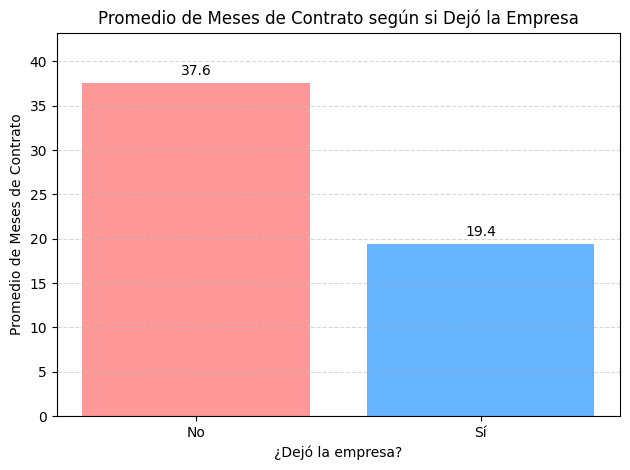

In [82]:
# Agrupar por churn y calcular promedio
promedio_tenure = datos.groupby('Churn')['customer_tenure'].mean().reset_index()

# Cambiar etiquetas True/False por 'Sí' y 'No'
promedio_tenure['Churn'] = promedio_tenure['Churn'].replace({True: 'Sí', False: 'No'})

# Gráfico de barras
plt.bar(promedio_tenure['Churn'], promedio_tenure['customer_tenure'], color=['#ff9999', '#66b3ff'])

# Ajustar el límite del eje Y para evitar que la etiqueta se salga
limite_superior = promedio_tenure['customer_tenure'].max() * 1.15
plt.ylim(0, limite_superior)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(promedio_tenure['customer_tenure']):
    plt.text(i, valor + 0.5, f'{valor:.1f}', ha='center', va='bottom', fontsize=10)

# Estética
plt.title('Promedio de Meses de Contrato según si Dejó la Empresa')
plt.xlabel('¿Dejó la empresa?')
plt.ylabel('Promedio de Meses de Contrato')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [83]:
datos=datos.drop(columns='customerID')

In [84]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7267 non-null   bool   
 1   customer_gender                7267 non-null   bool   
 2   customer_SeniorCitizen         7267 non-null   bool   
 3   customer_Partner               7267 non-null   bool   
 4   customer_Dependents            7267 non-null   bool   
 5   customer_tenure                7267 non-null   int64  
 6   phone_PhoneService             7267 non-null   bool   
 7   phone_MultipleLines            7267 non-null   bool   
 8   internet_InternetService       7267 non-null   object 
 9   internet_OnlineSecurity        7267 non-null   bool   
 10  internet_OnlineBackup          7267 non-null   bool   
 11  internet_DeviceProtection      7267 non-null   bool   
 12  internet_TechSupport           7267 non-null   b

In [85]:
datos['internet_InternetService'].value_counts()

,count
internet_InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [86]:
datos['account_Contract'].value_counts()

,count
account_Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [87]:
datos['account_PaymentMethod'].value_counts()

,count
account_PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [88]:

numericas = datos.select_dtypes(include=['int64', 'float64', 'bool'])
categoricas = datos.select_dtypes(include='object')
categoricas_encoded = pd.get_dummies(categoricas, drop_first=False)

In [89]:
base_correlacion = pd.concat([numericas, categoricas_encoded], axis=1)

In [90]:
base_correlacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7267 non-null   bool   
 1   customer_gender                                  7267 non-null   bool   
 2   customer_SeniorCitizen                           7267 non-null   bool   
 3   customer_Partner                                 7267 non-null   bool   
 4   customer_Dependents                              7267 non-null   bool   
 5   customer_tenure                                  7267 non-null   int64  
 6   phone_PhoneService                               7267 non-null   bool   
 7   phone_MultipleLines                              7267 non-null   bool   
 8   internet_OnlineSecurity                          7267 non-null   bool   
 9   internet_OnlineBackup         

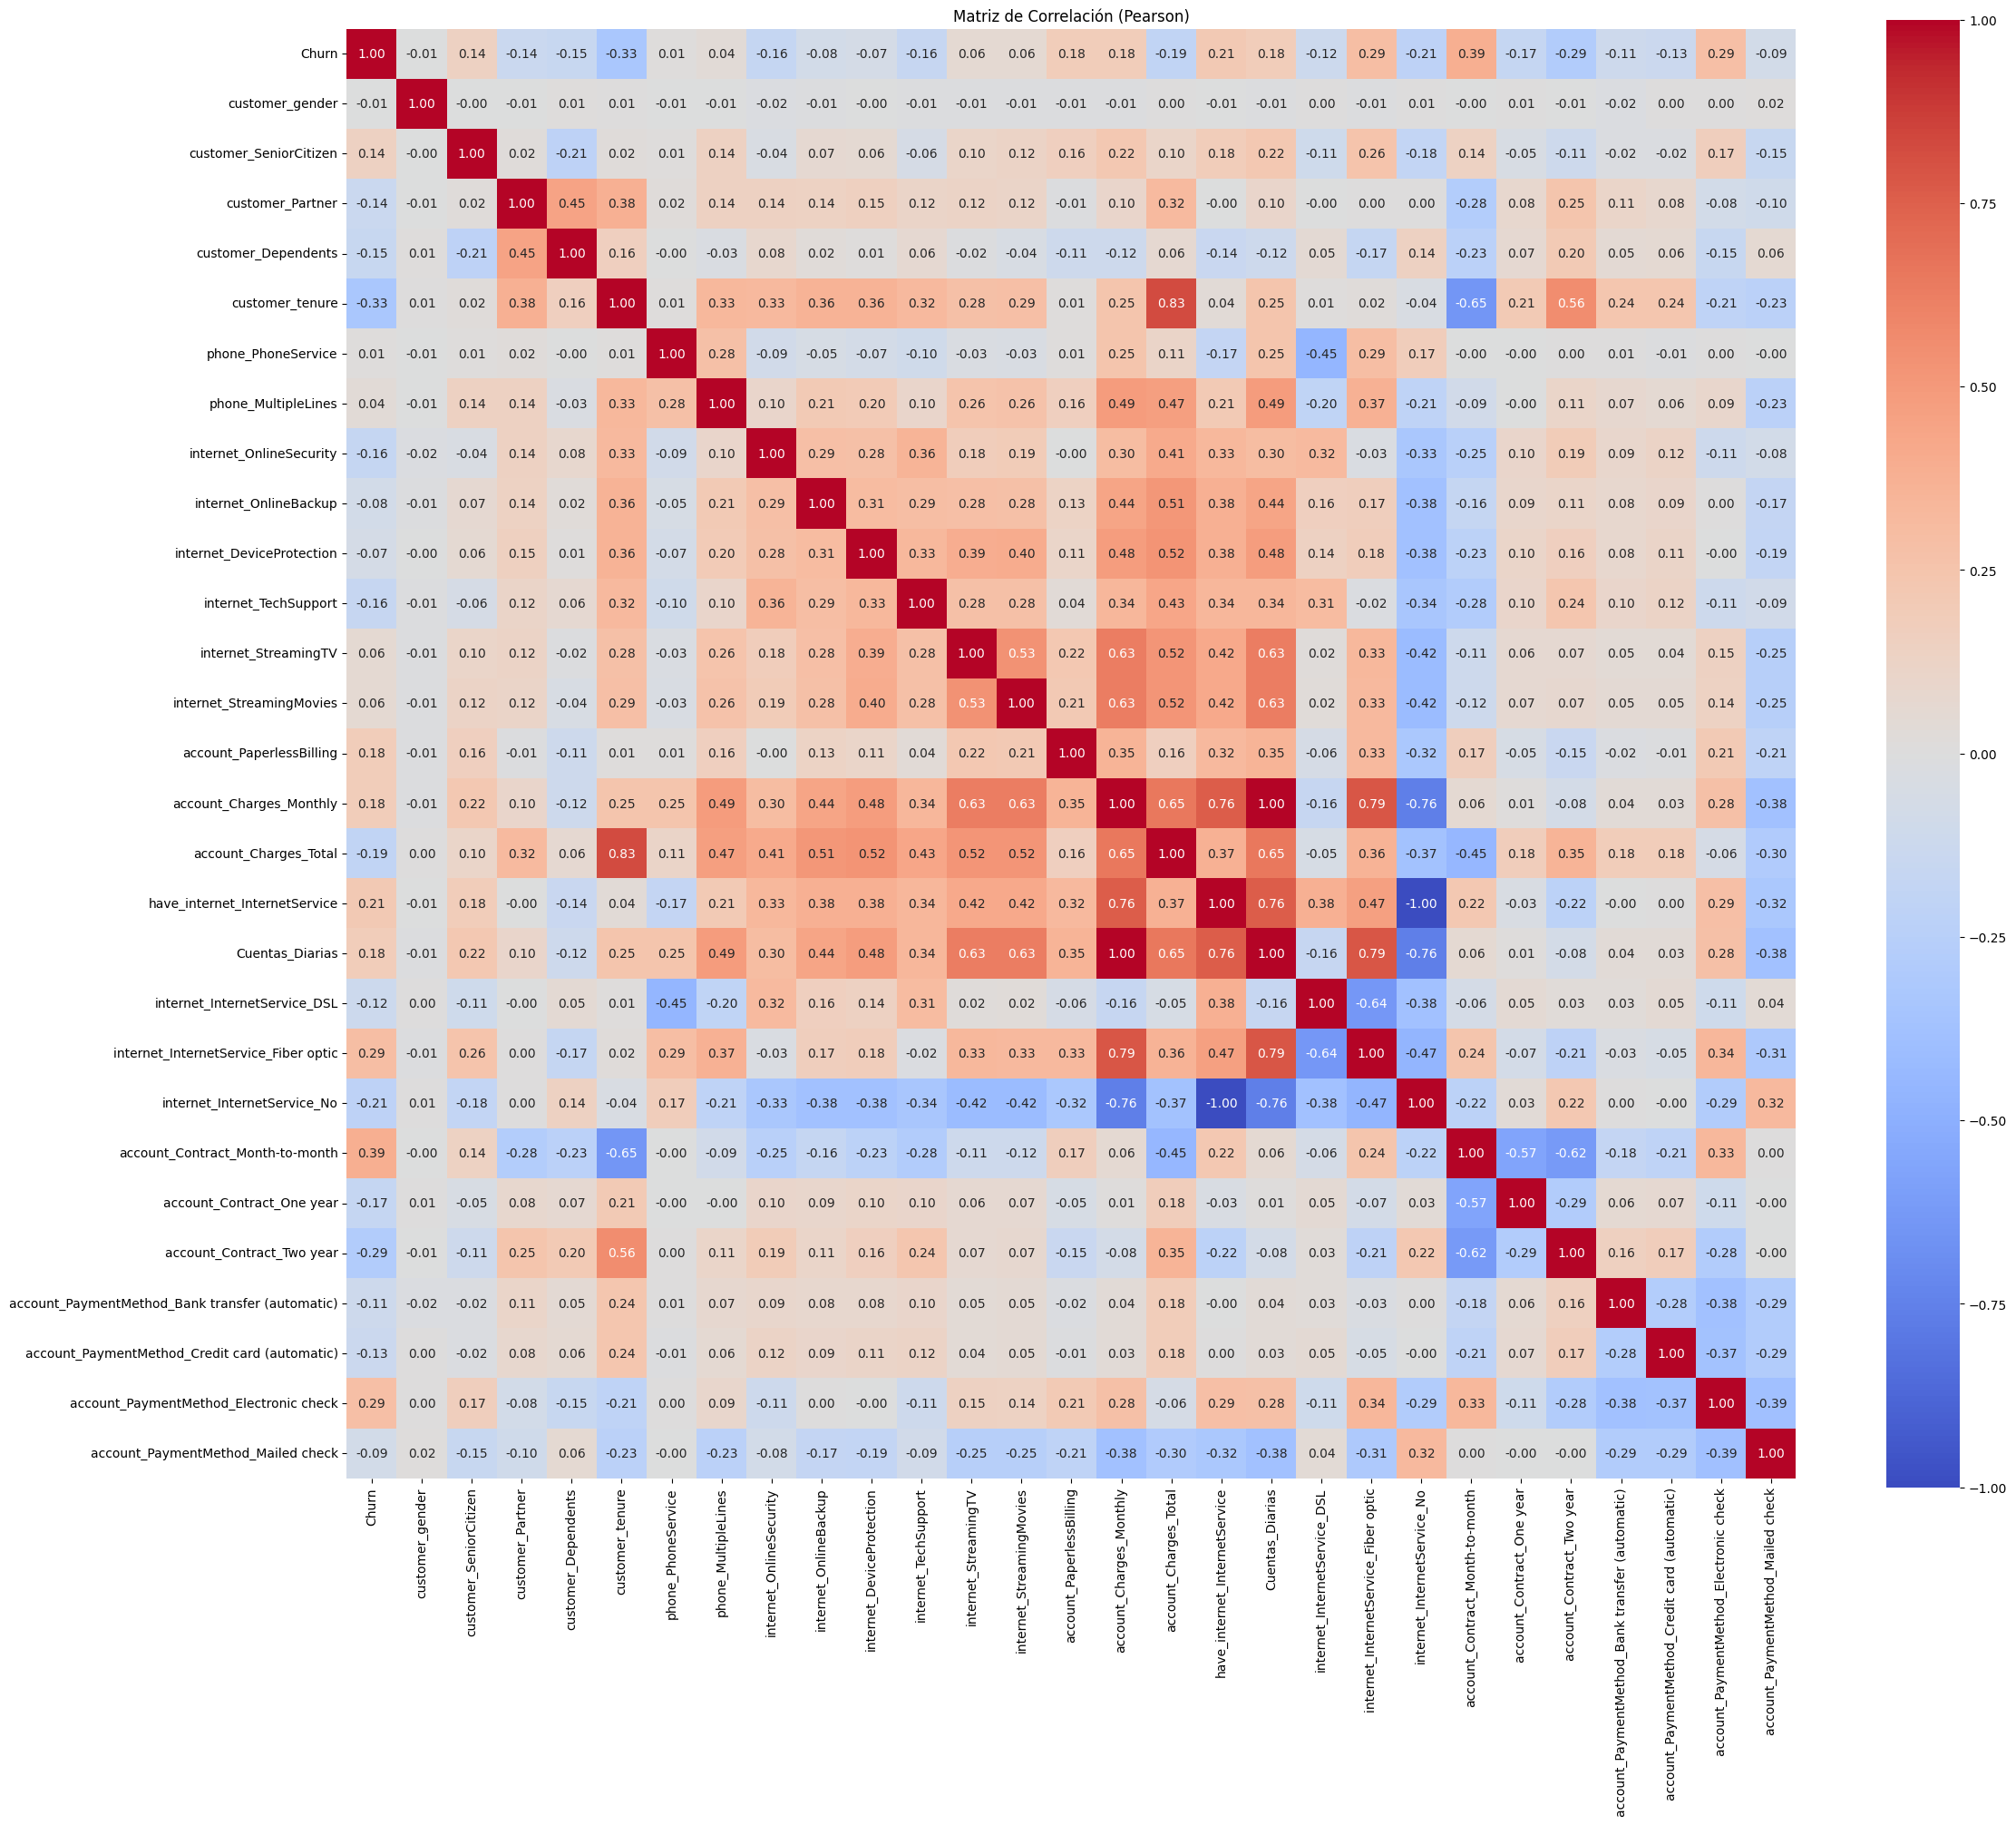

In [91]:
matriz_pearson = base_correlacion.corr(method='pearson')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,20))
sns.heatmap(matriz_pearson, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Matriz de Correlación (Pearson)')
plt.tight_layout()
plt.show()

## Análisis de Multicolinealidad

Al realizar el análisis de correlación, observamos que hay algunas variables que tienen una correlación igual a 1 o -1. se procede a eliminar por este motivo 'have_internet_InternetService' y 'account_Charges_Monthly'. Adicional, al crear las dummys siempre se debe eliminar una columna creada para evitar multicolinealidad. Por este motivo se eliminan 'internet_InternetService_No', 'account_Contract_Month-to-month' y 'account_PaymentMethod_Mailed check'

In [92]:
base_preparada=base_correlacion.drop(columns=['internet_InternetService_No','have_internet_InternetService','account_Charges_Monthly','account_Contract_Month-to-month','account_PaymentMethod_Mailed check'])

base_preparada.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,account_PaperlessBilling,account_Charges_Total,Cuentas_Diarias,internet_InternetService_DSL,internet_InternetService_Fiber optic,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check
0,False,False,False,True,True,9,True,False,False,True,...,True,593.30,2.186667,True,False,True,False,False,False,False
1,False,True,False,False,False,9,True,True,False,False,...,False,542.40,1.996667,True,False,False,False,False,False,False
2,True,True,False,False,False,4,True,False,False,False,...,True,280.85,2.463333,False,True,False,False,False,False,True
3,True,True,True,True,False,13,True,False,False,True,...,True,1237.85,3.266667,False,True,False,False,False,False,True
4,True,False,True,True,False,3,True,False,False,False,...,True,267.40,2.796667,False,True,False,False,False,False,False


#📄Informe final

**Análisis**



Al realizar el recorrido por la base de datos, vemos que el mayor abandono de clientes está relacionado con que el tipo de contrato es mensual y no a un año o ás. Vemos que en promedio aquellos que abandonan, tienen en promedio menos meses de contratoy esto, por ende, se ve reflejado en un menor gasto diario, mensual y anual frente a los que no abandonan. Se observa que no hay una diferencia significativa de abandono por género.

Por todo lo expuesto, se sugiere buscar campañas de fidelización, cosas como contratos con descuentos a largo plazo para disminuir el abandono de los clientes.


In [93]:
base_preparada.to_csv('base.csv')